<a href="https://colab.research.google.com/github/SeungHwan-Do/CJ_Remote_Internship/blob/main/0701/test0701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기

In [ ]:
#CSV파일을 읽어오기
drive_path = "/content/"

train = pd.read_csv(drive_path + "dataset1.csv")

print(train.shape)

(514, 9)


In [ ]:
# train 데이터프레임 내용 확인
train.head(3)

,Date,ID,Gender,Age,Shift,Injury Location,Incident Type,Days Lost,Incident Cost
0,2020-01-01,438312,Male,25,Night,Trunk,Burn,0.0,"$5,000"
1,2020-01-03,438333,Female,18,Day,Abdomen,Cut,0.0,"$4,994"
2,2020-01-03,438334,Male,35,Day,Back,Lifting,5.0,"$4,969"


# 데이터 살펴보기

### 데이터 구조

In [ ]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             514 non-null    object 
 1   ID               514 non-null    int64  
 2   Gender           514 non-null    object 
 3   Age              514 non-null    int64  
 4   Shift            514 non-null    object 
 5   Injury Location  472 non-null    object 
 6   Incident Type    514 non-null    object 
 7   Days Lost        514 non-null    float64
 8   Incident Cost    514 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 36.3+ KB


In [ ]:
# train 데이터프레임 통계정보
train.describe(include='all')

,Date,ID,Gender,Age,Shift,Injury Location,Incident Type,Days Lost,Incident Cost
count,514,5.140000e+02,514,514.000000,514,472,514,514.000000,514
unique,411,NaN,2,NaN,2,11,9,NaN,368
top,2022-06-28,NaN,Male,NaN,Night,Back,Burn,NaN,$0
freq,3,NaN,454,NaN,353,51,65,NaN,115
mean,NaN,3.667080e+07,NaN,36.317121,NaN,NaN,NaN,0.736381,NaN
std,NaN,1.584722e+07,NaN,11.466309,NaN,NaN,NaN,1.443565,NaN
min,NaN,4.383120e+05,NaN,18.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,4.404213e+07,NaN,26.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,4.426326e+07,NaN,34.000000,NaN,NaN,NaN,0.000000,NaN
75%,NaN,4.448514e+07,NaN,47.000000,NaN,NaN,NaN,0.500000,NaN


### 결측값 확인

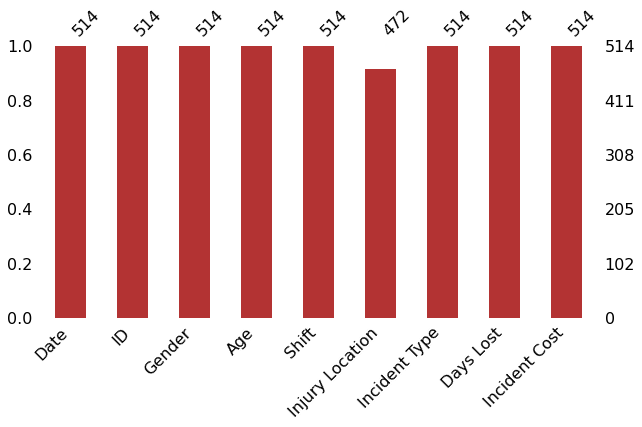

In [ ]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

### 데이터 전처리

# 피처 엔지니어링
- 문자열, 범주형 변수를 포함
- 데이터 탐색(EDA) 및 전처리(pre-processing) 포함

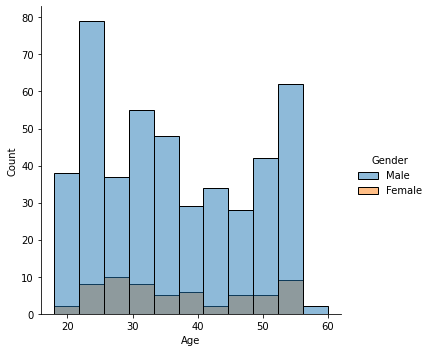

In [ ]:
# Age 분포
sns.displot(x='Age', kind='hist', hue='Gender', 
            data=train)
plt.show()

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train['month']=train['Date'].dt.month
#train['spring']=np.where((train['month']==3) or (train['month']==4) or (train['month']==5),'1','0')
train['season'] = "winter"
train.loc[train['month']<12, 'season']="fall"
train.loc[train['month']<9, 'season']="summer"
train.loc[(train['month']<6)& (train['month']>=3), 'season']="spring"
train.loc[(train['month']==1)| (train['month']==2), 'season']="winter"

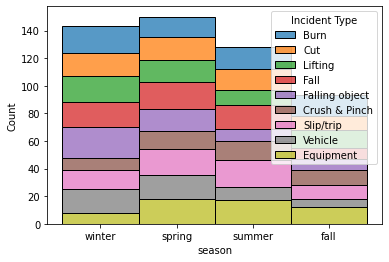

In [ ]:
sns.histplot(x = 'season', hue = 'Incident Type', multiple='stack',
              data=train)
#plt.legend(loc='best')
plt.show()

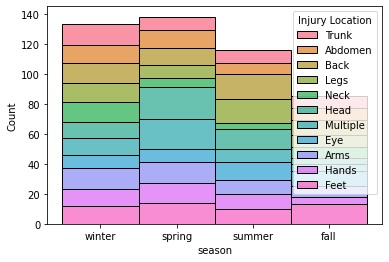

In [ ]:
sns.histplot(x = 'season', hue = 'Injury Location', multiple='stack',
              data=train)

#plt.legend(loc='best')
plt.show()

### Sex : 성별

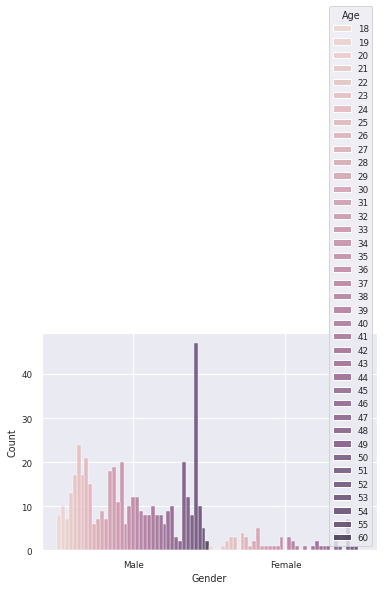

In [ ]:
# histplot 함수 - dodge 옵션
sns.histplot(x='Gender', hue='Age', multiple='dodge', 
             data=train)
plt.show()